In [196]:
import pandas as pd

In [197]:
data = pd.read_csv("drug200.csv")

In [198]:
X = data[data.columns[:5]]
Y = data['Drug']

In [199]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [200]:
Y.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [201]:
X = pd.get_dummies(X, columns = data.columns[1:4])

In [202]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state=0)

### Building two decision trees: One using entropy, second using gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.829\nentropy = 2.008\nsamples = 160\nvalue = [20, 15, 13, 40, 72]'),
 Text(0.5555555555555556, 0.7, 'BP_HIGH <= 0.5\nentropy = 1.846\nsamples = 88\nvalue = [20.0, 15.0, 13.0, 40.0, 0.0]'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'BP_NORMAL <= 0.5\nentropy = 0.804\nsamples = 53\nvalue = [0, 0, 13, 40, 0]'),
 Text(0.2222222222222222, 0.3, 'Cholesterol_NORMAL <= 0.5\nentropy = 1.0\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.7777777777777778, 0.5, 'Age <= 50.5\nentropy = 0.985\nsamples = 35\nvalue = [20, 15, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'ent

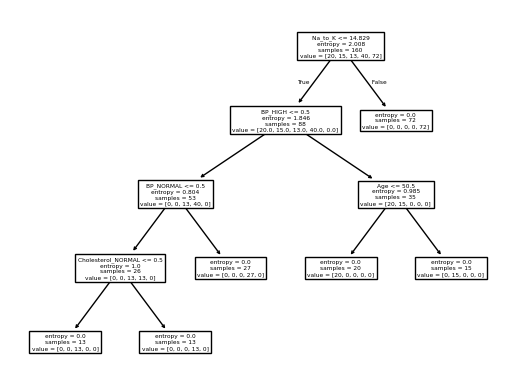

In [205]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names = X.columns)

[Text(0.625, 0.9, 'Na_to_K <= 14.829\ngini = 0.704\nsamples = 160\nvalue = [20, 15, 13, 40, 72]'),
 Text(0.5, 0.7, 'BP_HIGH <= 0.5\ngini = 0.691\nsamples = 88\nvalue = [20.0, 15.0, 13.0, 40.0, 0.0]'),
 Text(0.5625, 0.8, 'True  '),
 Text(0.25, 0.5, 'BP_LOW <= 0.5\ngini = 0.37\nsamples = 53\nvalue = [0, 0, 13, 40, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.375, 0.3, 'Cholesterol_HIGH <= 0.5\ngini = 0.5\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.5, 'Age <= 50.5\ngini = 0.49\nsamples = 35\nvalue = [20, 15, 0, 0, 0]'),
 Text(0.625, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 72\nvalue = [0, 0, 0, 0, 72]'),
 Text(0.6875, 0.8, '  False')]

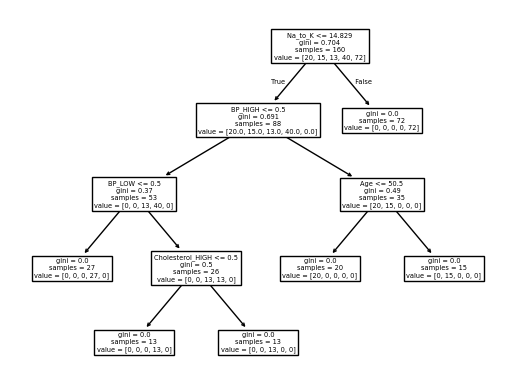

In [206]:
plot_tree(model2, feature_names = X.columns)

In [207]:
y = model.predict(pd.get_dummies(x_test))
y2 = model2.predict(pd.get_dummies(x_test))

In [208]:
from sklearn.metrics import accuracy_score
print("Accuracy using first model:", accuracy_score(y_test, y))
print("Accuracy using second model:", accuracy_score(y_test, y2))

Accuracy using first model: 1.0
Accuracy using second model: 1.0
